# DotA 2 Exploratory data analysis

__Content__
1. Into
2. Setup
3. Data exploration
4. Primary data analysis
5. Geting insights
6. Predictive analysis

Dota 2 is a multiplayer MOBA video game. Players play matches with each other. Each match involves two teams, 5 people each. One team plays for the light side (The Radiant), the other for the dark side (The Dire). The goal of each team is to destroy the main building of the enemy base (throne). <br><br>
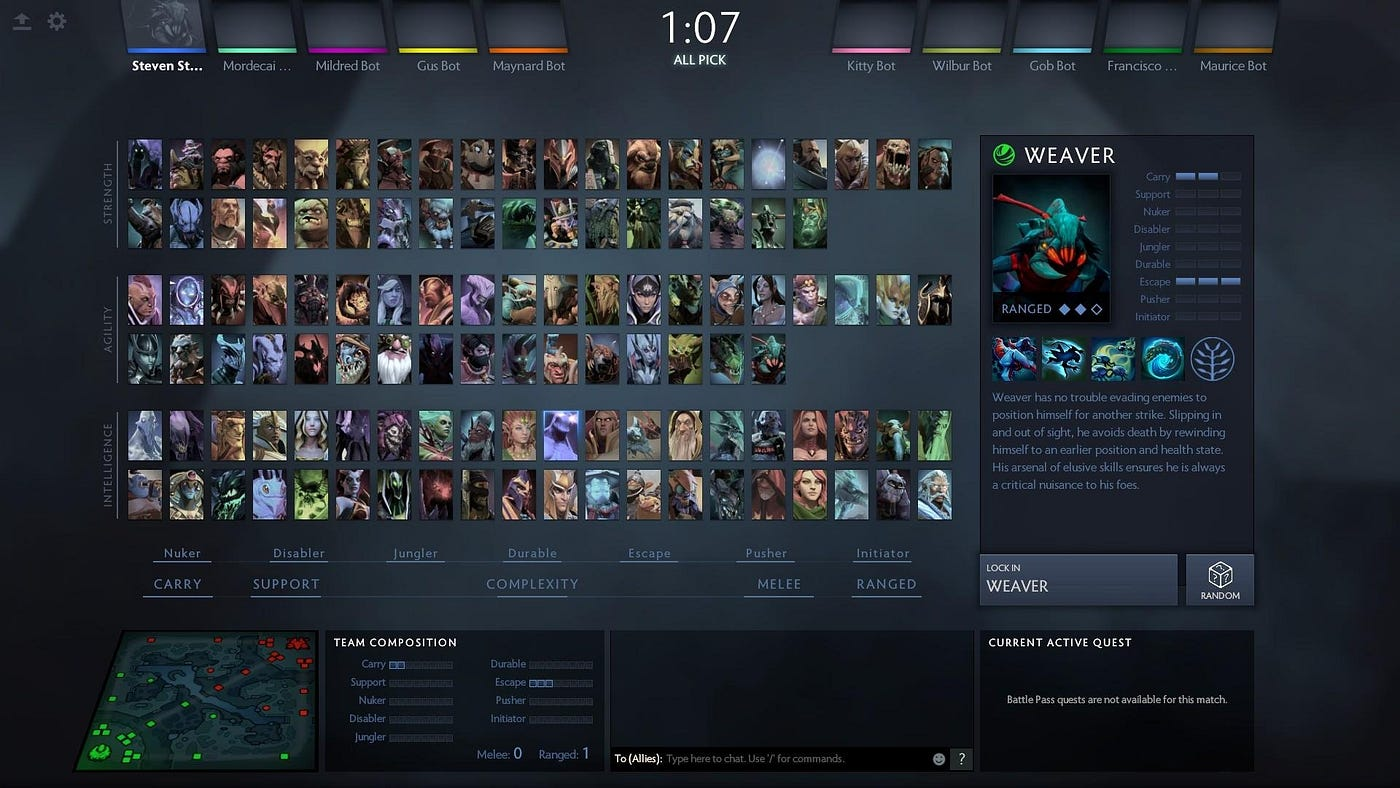
<br>
<br>
This dataset contains 50000 ranked ladder matches from the Dota 2 data dump created by Opendota.<br>
The dataset taken from __[here](https://www.kaggle.com/datasets/devinanzelmo/dota-2-matches)__

Data licence __[CC BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0/)__

___

## Setup

In [4]:
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)

C:\Program Files\Python39\python.exe
3.9.7 (tags/v3.9.7:1016ef3, Aug 30 2021, 20:19:38) [MSC v.1929 64 bit (AMD64)]
sys.version_info(major=3, minor=9, micro=7, releaselevel='final', serial=0)


In [24]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import os

In [25]:
print(np.__version__)
print(pd.__version__)
print(sns.__version__)

1.20.3
1.3.2
0.11.2


In [26]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

___

### Data exploration

First, let's examine the contents of the files. Get a list of files in a directory:

In [12]:
os.listdir('../archive')

['ability_ids.csv',
 'ability_upgrades.csv',
 'chat.csv',
 'cluster_regions.csv',
 'hero_names.csv',
 'item_ids.csv',
 'match.csv',
 'match_outcomes.csv',
 'objectives.csv',
 'patch_dates.csv',
 'players.csv',
 'player_ratings.csv',
 'player_time.csv',
 'purchase_log.csv',
 'teamfights.csv',
 'teamfights_players.csv',
 'test_labels.csv',
 'test_player.csv',
 'yasp_sample.json']

___

Let's begin with reading table

`match_id` A unique identifier for the match. <br>
`start_time` The start time of the match in Unix time format. <br>
`duration` The duration of the match in seconds.<br>
`tower_status_radiant` A binary code representing the status of Radiant team's towers at the end of the match. <br>
`tower_status_dire` A binary code representing the status of Dire team's towers at the end of the match. <br>
`barracks_status_dire` A binary code representing the status of Dire team's barracks at the end of the match. <br>
`barracks_status_radiant` A binary code representing the status of Radiant team's barracks at the end of the match. <br>
`first_blood_time` The time in seconds when the first blood occurred in the match. <br>
`game_mode` An integer code representing the game mode of the match. <br>
`radiant_win` A boolean value representing whether the Radiant team won the match or not. <br>
`negative_votes` The number of negative votes the match received from players. <br>
`positive_votes` The number of positive votes the match received from players. <br>
`cluster` An integer code representing the cluster or region where the match was played. <br>
<br>
This table has a lot of useful metadata on the results of the match

In [11]:
df_match = pd.read_csv('../archive/match.csv')
df_match.head(10)

match_id  start_time  duration  tower_status_radiant  tower_status_dire  barracks_status_dire  barracks_status_radiant  first_blood_time  game_mode  radiant_win  negative_votes  positive_votes  cluster
0         0  1446750112      2375                  1982                  4                     3                       63                 1         22         True               0               1      155
1         1  1446753078      2582                     0               1846                    63                        0               221         22        False               0               2      154
2         2  1446764586      2716                   256               1972                    63                       48               190         22        False               0               0      132
3         3  1446765723      3085                     4               1924                    51                        3                40         22        False               0               0      191
4         4  1446796385      1887                  2047                  0                     0                       63                58         22         True               0               0      156
5         5  1446798766      1574                  2047                  4                     3                       63               113         22         True               0               0      155
6         6  1446800938      2124                  1972                  0                     3                       63                 4         22         True               0               0      151
7         7  1446804030      2328                  2046                  0                     0                       63               255         22         True               0               0      138
8         8  1446819063      2002                     0               1982                    63                        0                 4         22        False               0               0      182
9         9  1446837251      2961                     0               1972                    63                        0                85         22        False               0               0      133

___

`match_id` A unique identifier for the match. <br>
`account_id_0` --  `account_id_4` A unique identifier for the player. <br>
`start_time` The start time of the match in Unix time format. <br>
`parser_version` OpenDota parser number <br>
`win` Match status for the team <br>
`rad` Side status

In [15]:
df_match_outcomes = pd.read_csv('../archive/match_outcomes.csv')
df_match_outcomes.head(10)

match_id  account_id_0  account_id_1  account_id_2  account_id_3  account_id_4  start_time  parser_version  win  rad
0  1636204962         34549             0             0     -51743434    -120875154  1437014585              12    1    0
1  1636204962             0         61598        138825             0        207232  1437014585              12    0    1
2  1636322679             0     -44943233    -240360907         19599             0  1437019968              12    0    0
3  1636322679     -97530201             0             0             0    -116349387  1437019968              12    1    1
4  1637385965             0             0             0        104738             0  1437052551              12    1    0
5  1637385965             0             0        278620        278619             0  1437052551              12    0    1
6  1637623870    -123447796         68408    -100048908     -16784805        320715  1437058007              12    1    0
7  1637623870    -108454938    -251819996             0         51172    -106710926  1437058007              12    0    1
8  1637739731        320093             0        178850     -45490226    -119392638  1437060903              12    0    0
9  1637739731             0        241925    -115963827         14072     -67386586  1437060903              12    1    1

___

`match_id` A unique identifier for the match. <br>
`times` Time from start <br>
`gold_t_0` - `gold_t_132` Earned gold <br>
`lh_t_0` - `lh_t_132` Last hits on creeeps <br>
`xp_t_0` - `xp_t_132` Earned experience <br>
<br>
Interesing table with hero progess on each 60 seconds

In [22]:
df_player_time = pd.read_csv('../archive/player_time.csv')
df_player_time.head(10)

match_id  times  gold_t_0  lh_t_0  xp_t_0  gold_t_1  lh_t_1  xp_t_1  gold_t_2  lh_t_2  xp_t_2  gold_t_3  lh_t_3  xp_t_3  gold_t_4  lh_t_4  xp_t_4  gold_t_128  lh_t_128  xp_t_128  gold_t_129  lh_t_129  xp_t_129  gold_t_130  lh_t_130  xp_t_130  gold_t_131  lh_t_131  xp_t_131  gold_t_132  lh_t_132  xp_t_132
0         0      0         0       0       0         0       0       0         0       0       0         0       0       0         0       0       0           0         0         0           0         0         0           0         0         0           0         0         0           0         0         0
1         0     60       409       0      63       142       1     186       168       0     125       200       0     193       194       1     125         174         2        77         138         1        62         345         6       351         100         0        77         613         1       125
2         0    120       546       0     283       622       4     645       330       0     376       345       1     698       628       5     374         354         4       437         673         5       543         684        12       805         200         0       210         815         5       323
3         0    180       683       1     314       927       9    1202       430       0     376       644       6    1172       806       7     570         614         8       829         895         8       842         958        16      1135         300         0       210        1290         8       527
4         0    240       956       1     485      1264      11    1583       530       0     391       919      11    1610      1281      10    1216        1082         8      1318        1087        10      1048        1500        26      1842         400         0       210        1431         9       589
5         0    300      1056       1     649      1451      13    1810       630       0     504      1102      15    1888      1708      17    1633        1300        11      1901        1233        11      1352        1841        32      2162         500         0       241        2110        17       918
6         0    360      1156       1     680      1744      18    2192       730       0     535      1326      18    2197      2339      21    2203        1520        14      2231        1497        15      1806        2186        38      2554         600         0       241        2623        28      1248
7         0    420      1257       2     778      2053      23    2584       830       0     566      1711      25    2558      2693      27    2574        1620        14      2231        1761        19      2033        2652        47      3111         700         0       241        3033        28      1329
8         0    480      1809       3    1135      2536      32    3153      1328       0    1144      2075      32    3161      3269      31    3046        1720        14      2384        2126        25      2575        3196        57      3715         858         1       300        3380        32      1535
9         0    540      2111       3    1393      3033      33    3449      1510       1    1306      2386      39    3398      3606      36    3361        2194        22      2905        2306        27      2967        3629        65      4169         958         1       300        3648        34      1697

___

`match_id` A unique identifier for the match. <br>
`key` Event key <br>
`player1` The player who caused the event <br>
`slot` Chat slot <br>
`subtype`  Event type <br>
`time` Event time <br>
`value` Event value (example barack kill) <br>
<br>
Table with event timing

In [19]:
df_objectives = pd.read_csv('../archive/objectives.csv')
df_objectives.head(10)

match_id  key  player1  player2  slot                   subtype  team  time  value
0         0  NaN        0        6   0.0   CHAT_MESSAGE_FIRSTBLOOD   NaN     1    309
1         0  NaN        3       -1   3.0   CHAT_MESSAGE_TOWER_KILL   2.0   894      2
2         0  NaN        2       -1   NaN  CHAT_MESSAGE_ROSHAN_KILL   2.0   925    200
3         0  NaN        1       -1   1.0        CHAT_MESSAGE_AEGIS   NaN   925      0
4         0  NaN        7       -1   7.0   CHAT_MESSAGE_TOWER_KILL   3.0  1016      3
5         0  NaN        3       -1   3.0   CHAT_MESSAGE_TOWER_KILL   2.0  1024      2
6         0  NaN       -1       -1  -1.0   CHAT_MESSAGE_TOWER_KILL   2.0  1446      2
7         0  NaN        4       -1   4.0   CHAT_MESSAGE_TOWER_KILL   2.0  1590      2
8         0  NaN        2       -1   NaN  CHAT_MESSAGE_ROSHAN_KILL   2.0  1740    200
9         0  NaN        1       -1   1.0        CHAT_MESSAGE_AEGIS   NaN  1740      0

___

In [20]:
df_players = pd.read_csv('../archive/players.csv')
df_players.head(15)

match_id  account_id  hero_id  player_slot  gold  gold_spent  gold_per_min  xp_per_min  kills  deaths  assists  denies  last_hits    stuns  hero_damage  hero_healing  tower_damage  item_0  item_1  item_2  item_3  item_4  item_5  level  leaver_status  xp_hero  xp_creep  xp_roshan  xp_other  gold_other  gold_death  gold_buyback  gold_abandon  gold_sell  gold_destroying_structure  gold_killing_heros  gold_killing_creeps  gold_killing_roshan  gold_killing_couriers  unit_order_none  unit_order_move_to_position  unit_order_move_to_target  unit_order_attack_move  unit_order_attack_target  unit_order_cast_position  unit_order_cast_target  unit_order_cast_target_tree  unit_order_cast_no_target  unit_order_cast_toggle  unit_order_hold_position  unit_order_train_ability  unit_order_drop_item  unit_order_give_item  unit_order_pickup_item  unit_order_pickup_rune  unit_order_purchase_item  unit_order_sell_item  unit_order_disassemble_item  unit_order_move_item  unit_order_cast_toggle_auto  \
0          0           0       86            0  3261       10960           347         362      9       3       18       1         30  76.7356         8690           218           143     180      37      73      56     108       0     16              0   8840.0    5440.0        NaN      83.0        50.0      -957.0           NaN           NaN      212.0                     3120.0              5145.0               1087.0                400.0                    NaN              NaN                       4070.0                        1.0                    25.0                     416.0                      51.0                   144.0                          3.0                       71.0                     NaN                     188.0                      16.0                   NaN                   NaN                     NaN                     2.0                      35.0                   2.0                          NaN                  11.0                          NaN   
1          0           1       51            1  2954       17760           494         659     13       3       18       9        109  87.4164        23747             0           423      46      63     119     102      24     108     22              0  14331.0    8440.0     2683.0     671.0       395.0     -1137.0           NaN           NaN     1650.0                     3299.0              6676.0               4317.0                937.0                    NaN              NaN                       5894.0                      214.0                   165.0                    1031.0                      98.0                    39.0                          4.0                      439.0                     NaN                     346.0                      22.0                   NaN                   NaN                    12.0                    52.0                      30.0                   4.0                          NaN                  21.0                          NaN   
2          0           0       83            2   110       12195           350         385      0       4       15       1         58     None         4217          1595           399      48      60      59     108      65       0     17              0   6692.0    8112.0        NaN     453.0       259.0     -1436.0       -1015.0           NaN        NaN                     3142.0              2418.0               3697.0                400.0                    NaN              NaN                       7053.0                        3.0                   132.0                     645.0                      36.0                   160.0                         20.0                      373.0                     NaN                     643.0                      17.0                   5.0                   NaN                     7.0                     8.0                      28.0                   NaN                          1.0                  18.0                          NaN   
3          0    

Данные об игроках под конец игры

In [21]:
df_player_ratings = pd.read_csv('../archive/player_ratings.csv')
df_player_ratings.head(5)

account_id  total_wins  total_matches  trueskill_mu  trueskill_sigma
0      236579          14             24     27.868035         5.212361
1        -343           1              1     26.544163         8.065475
2       -1217           1              1     26.521103         8.114989
3       -1227           1              1     27.248025         8.092217
4       -1284           0              1     22.931016         8.092224

Профили игроков

Отличная таблица с матчами и временем

In [ ]:
df_purchase_log = pd.read_csv('../archive/purchase_log.csv')
df_purchase_log.head(10)

In [ ]:
df_teamfights = pd.read_csv('../archive/teamfights.csv')
df_teamfights.head(10)

In [ ]:
df_teamfights_players = pd.read_csv('../archive/teamfights_players.csv')
df_teamfights_players.head(10)

In [ ]:
df_ability_ids = pd.read_csv('../archive/ability_ids.csv')
df_ability_ids.head(10)

In [ ]:
len(df_ability_ids)

Меппинг id способности и его полное названия. Итого у нас есть 688 разных способностей

In [ ]:
df_ability_upgrades = pd.read_csv('../archive/ability_upgrades.csv')
df_ability_upgrades.head(10)

В Доте 2 при каждом повышении уровня можно прокачать одну способность. <br>
На 6 можно открыть ульту - чаще всего это самая сильная способность способная изменить ход битвы. При анализе будет полезно узнать время открытая ульты.<br>
Данная таблица показывает в каком порядке и в какое время качали свои способности герои<br>

In [ ]:
df_chat = pd.read_csv('../archive/chat.csv')
df_chat.head(10)

Сообщения из чата зачастую бывают забавными

In [ ]:
df_cluster_regions = pd.read_csv('../archive/cluster_regions.csv')
df_cluster_regions.head(5)

Меппинг кластера и его названия

In [ ]:
df_hero_names = pd.read_csv('../archive/hero_names.csv')
df_hero_names.head(10)

Меппинг системного названия, id и имени героя

In [ ]:
df_item_ids = pd.read_csv('../archive/item_ids.csv')
df_item_ids.head(10)

Меппинг айди вещи и его имени

In [ ]:
df_patch_dates = pd.read_csv('../archive/patch_dates.csv')
df_patch_dates.head(10)

Данные про патчи игры

In [ ]:
df_test_labels = pd.read_csv('../archive/test_labels.csv')
df_test_labels.head(10)

In [ ]:
df_test_player = pd.read_csv('../archive/test_player.csv')
df_test_player.head(10)

## Primary analysis

In [ ]:
df_match["duration_min"] = df_match.apply(lambda x: int(x['duration'] / 60), axis=1)

In [ ]:
df_match["duration_min"].min()

In [ ]:
df_match["duration_min"].max()

In [ ]:
df_match["duration_min"].mean()

In [ ]:
sns.set(rc={'figure.figsize':(13,9)})

In [ ]:
sns.set_style("whitegrid")

In [ ]:
sns.set_style(rc = {'axes.facecolor': 'lightsteelblue'})

In [ ]:
sns.color_palette("rocket", as_cmap=True)

In [ ]:
sns.color_palette()

In [ ]:
sns.histplot(data=df_match[['duration_min']], x="duration_min", palette = "Set1")

In [ ]:
Q3 = np.quantile(df_match['duration_min'], 0.75)
Q1 = np.quantile(df_match['duration_min'], 0.25)
IQR = Q3 - Q1
lowerRange = Q1 - 1.5 * IQR
upperRange = Q3 + 1.5 * IQR

In [ ]:
lowerRange, upperRange

In [ ]:
dfIqr = df_match[df_match['duration_min'].between(lowerRange, upperRange)]

In [ ]:
sns.histplot(data=dfIqr[['duration_min']], x="duration_min", palette = "Set2", edgecolor = "black")

### Hero popularity

$$
P(h) = g_{hero} / g_{total} * 100
$$
<br>
We can find the probability of encountering a hero in match with a simple formula

In [ ]:
df_hero_names.head()

In [ ]:
df_players.head(7)

In [ ]:
df_heros_in_match = df_players.groupby('match_id')['hero_id'].apply(list)

In [ ]:
def find_populatity(hero_id):
    total = df_heros_in_match.map(lambda x: 1 if hero_id in x else 0).sum()
    percentage = total / len(df_heros_in_match)
    return percentage * 100

In [ ]:
df_hero_names['popularity'] = df_hero_names.apply(lambda x: find_populatity(x['hero_id']), axis = 1)

In [ ]:
df_hero_names.sort_values(by=['popularity'], ascending=False)[['localized_name', 'popularity']].head(10)

### Hero win rate

$$
P(w) = g_{win} / g_{total} * 100
$$

In [ ]:
df_side = df_players[['match_id', 'hero_id', 'player_slot']]
df_side.head(8)

In [ ]:
df_side['dire'] = df_side['player_slot'].map(lambda x: 1 if x > 5 else 0)

In [ ]:
df_side['radiant'] = df_side['player_slot'].map(lambda x: 1 if x < 5 else 0)

In [ ]:
df_side.head(8)

In [ ]:
df_match_result = df_match[['match_id', 'radiant_win']]

In [ ]:
df_side = df_side.merge(df_match_result, how='left', on='match_id')

In [ ]:
def true_win(row):
    dire = row['dire']
    radiant = row['radiant']
    radiant_win = row['radiant_win']
    if radiant_win:
        return radiant
    else:
        return dire

In [ ]:
df_side['win'] = df_side.apply(lambda row: true_win(row), axis = 1)

In [ ]:
df_side.head(6)

In Dota, there cannot be a duplicate hero in a match

In [ ]:
def calculate_win_rate(hero_id):
    total_matches = df_side[df_side['hero_id'] == hero_id]['match_id'].count()
    total_wins = df_side[df_side['hero_id'] == hero_id]['win'].sum()
    win_rate = total_wins / total_matches * 100
    return win_rate

In [ ]:
df_hero_names['win_rate'] = df_hero_names['hero_id'].map(lambda x: calculate_win_rate(x))
df_hero_names.head()

In [ ]:
df_hero_names.sort_values(by=['win_rate'], ascending=False)[['localized_name', 'win_rate']].head(10)

### Most effective combo

In [ ]:
import itertools

In [ ]:
nums = df_hero_names['hero_id'].values

In [ ]:
permutations = list(itertools.permutations(nums, 2))

Total number of combos

In [ ]:
len(permutations)

In [ ]:
df_side

In [ ]:
d = {'col1': [1, 2], 'col2': [3, 4]}

In [ ]:
df_side['match_id'].max()

In [ ]:
def get_win(group):
    match_id = group['match_id'].max()
    hero_ids = group['hero_id'].values
    win = group['win'].max()
    d = {'match_id': match_id, 'hero_ids': [hero_ids], 'win' : win}
    row = pd.DataFrame(data=d)
    return row
    #print(row)

In [ ]:
df_win_grouped = df_side.groupby(['match_id', 'dire']).apply(get_win)

In [ ]:
df_win_grouped.head(10)

In [ ]:
51 in [86, 51, 83, 11, 67]

In [ ]:
def check_combo(combo, row):
    if combo[0] in row['hero_ids']:
        if combo[1] in row['hero_ids']:
            return 1
    return 0

In [ ]:
def check_combo_win(combo, row):
    if combo[0] in row['hero_ids']:
        if combo[1] in row['hero_ids']:
            if row['win'] == 1:
                return 1
    return 0

In [ ]:
dictionary

In [ ]:
dictionary = {}
for i in permutations:
    total = df_win_grouped.apply(lambda x: check_combo(i, x), axis = 1).sum()
    wins = df_win_grouped.apply(lambda x: check_combo_win(i, x), axis = 1).sum()
    print(wins / total * 100)
    
    name = str(i[0]) + "," +str(i[1])
    dictionary[name] = wins / total * 100

### Highest kills per match

In [ ]:
df_kills = df_players[['match_id', 'hero_id', 'kills']]

In [ ]:
def average_kills(hero_id):
    avg = df_kills[df_kills['hero_id'] == hero_id]['kills'].mean()
    return avg

In [ ]:
df_hero_names["average_kills"] = df_hero_names['hero_id'].map(average_kills)

In [ ]:
df_hero_names.sort_values(by=['average_kills'], ascending=False)[['localized_name', 'average_kills']].head(10)

### Top items

In [ ]:
df_item_ids.head()

In [ ]:
df_purchase_log.head()

In [ ]:
def items_percentage_in_matches(item):
    total = 50000
    items = items_in_match.map(lambda x: 1 if item in x else 0).sum()
    return items/total * 100

In [ ]:
df_item_ids['appear_percentage'] = df_item_ids.apply(lambda x: items_percentage_in_matches(x['item_id']), axis = 1)

In [ ]:
df_item_ids.head(15)

In [ ]:
items_in_match = df_purchase_log.groupby('match_id')['item_id'].apply(list)

In [ ]:
items_in_match.map(lambda x: 1 if 1 in x else 0).sum()

### Top first item picks

In [ ]:
df_purchase_log.head()

In [ ]:
df_purchase_log_top_5 = df_purchase_log.groupby(['match_id', 'player_slot'], as_index=False).head(5)[['item_id', 'match_id', 'player_slot']]

In [ ]:
df_purchase_log_top_5.head(10)

In [ ]:
purchase_log_top_5 = df_purchase_log_top_5.groupby(['match_id', 'player_slot'])['item_id'].apply(list)

In [ ]:
def items_percentage_in_matches_top_5(item):
    total = 50000
    items = purchase_log_top_5.map(lambda x: 1 if item in x else 0).sum()
    return items/total * 100

In [ ]:
df_item_ids['first_buy_items'] = df_item_ids.apply(lambda x: items_percentage_in_matches_top_5(x['item_id']), axis = 1)

In [ ]:
df_item_ids.head(30)

In [ ]:
df_items_popular = items.value_counts().to_frame().reset_index().rename(columns={"index": "item", "item_id": "count"})